In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import periodogram

In [12]:
# 生成示例时间序列数据 (周期为 365 天)
np.random.seed(0)
days = pd.date_range(start="2020-01-01", periods=1000)
# 假设时间序列数据有年周期
ts = np.sin(2 * np.pi * days.dayofyear / 365)  # + 0.005 * np.random.normal(size=len(days))

# 创建 DataFrame 方便处理
df = pd.DataFrame({'Date': days, 'Value': ts})

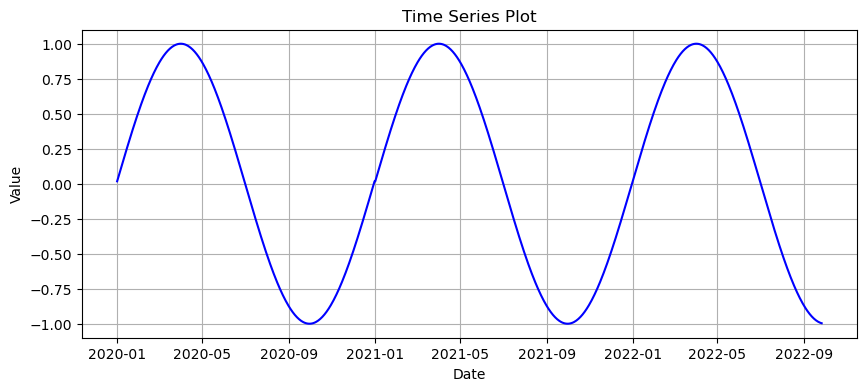

In [13]:
# 绘制时间序列图
plt.figure(figsize=(10, 4))
plt.plot(df['Date'], df['Value'], label="Time Series Data", color="blue")
plt.title("Time Series Plot")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.show()

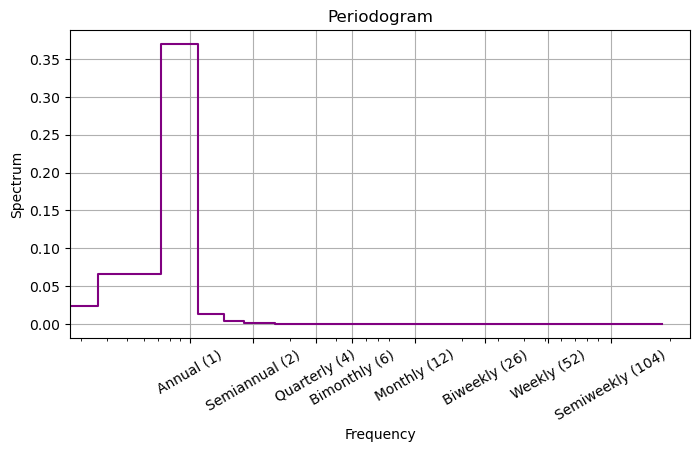

In [14]:
fs = pd.Timedelta("365D") / pd.Timedelta("1D")

# 计算周期图
frequencies, spectrum = periodogram(ts, fs=fs, detrend='linear', window="boxcar", scaling='spectrum')

# 绘制周期图
plt.figure(figsize=(8, 4))
plt.step(frequencies, spectrum, color="purple")
plt.xscale("log")
plt.xticks([1, 2, 4, 6, 12, 26, 52, 104], 
           ["Annual (1)", "Semiannual (2)", "Quarterly (4)", "Bimonthly (6)", 
            "Monthly (12)", "Biweekly (26)", "Weekly (52)", "Semiweekly (104)"],
           rotation=30)
plt.xlabel("Frequency")
plt.ylabel("Spectrum")
plt.title("Periodogram")
plt.grid(True)
plt.show()